In [1]:
import pandas as pd 
from IPython.display import display
import re
import math

In [2]:
data = pd.read_csv("./TRAIN.csv")

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from nltk.corpus import stopwords 
#Clean the text by retaining only alphabets and converting all the characters to small
def clean_up(review):
    clean = re.sub("[^a-zA-Z]"," ",review)
    #replace multiple space by a single
    clean = re.sub(' +', ' ',clean)
    
    word_tokens= clean.lower().split()
    
    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))     
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned =" ".join(word_tokens)
    #re.sub(' +', ' ',string4)
    return cleaned

In [5]:
data['cleaned'] = data['text'].apply(clean_up)

In [6]:
data.head(3)

,text,author,cleaned
0,They have been pronounced by an\r\n\r\n\r\n\r\...,2,pronounced expert rare variety considerable va...
1,His partner sailed along in\r\n\r\n\r\n\r\n\r\...,0,partner sailed along front though noticed noth...
2,The cushions were a good deal higher\r\n\r\n\r...,5,cushion good deal higher ball ball fashion alw...


In [8]:
l = ['author','cleaned']
display_all(data[l].head().transpose())

,0,1,2,3,4
author,2,0,5,4,0
cleaned,They have been pronounced by an expert to be o...,His partner sailed along in front of him as th...,The cushions were a good deal higher than the ...,O God grant that in his presence I may rather ...,The grass glowed with bright and fragrant flow...


In [9]:
data[l].head(4)

,author,cleaned
0,2,They have been pronounced by an expert to be o...
1,0,His partner sailed along in front of him as th...
2,5,The cushions were a good deal higher than the ...
3,4,O God grant that in his presence I may rather ...


In [10]:
data.dtypes

text       object
author      int64
cleaned    object
dtype: object

In [11]:
data.shape
#18,977 training examples

(18977, 3)

In [8]:
data['Text_Length'] = data['cleaned'].str.len()

In [9]:
data.head()

,text,author,cleaned,Text_Length
0,They have been pronounced by an\r\n\r\n\r\n\r\...,2,pronounced expert rare variety considerable va...,415
1,His partner sailed along in\r\n\r\n\r\n\r\n\r\...,0,partner sailed along front though noticed noth...,793
2,The cushions were a good deal higher\r\n\r\n\r...,5,cushion good deal higher ball ball fashion alw...,1305
3,"O God, grant that in his presence I may\r\n\r\...",4,god grant presence may rather see vileness beh...,652
4,The grass\r\n\r\n\r\n\r\n\r\nglowed with brigh...,0,grass glowed bright fragrant flower bird flyin...,648


In [10]:
#raw_valid.ProductSize.value_counts().plot.barh();
data.author.value_counts()

0    3859
5    3517
4    3184
2    2621
3    1314
9    1142
7    1054
8     910
6     755
1     621
Name: author, dtype: int64

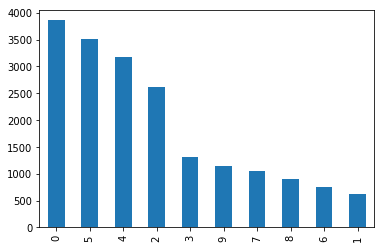

In [11]:
#Look at the distribution of the class among the 10 classes
import matplotlib.pyplot as plt
data.author.value_counts().plot.bar()
plt.show()

In [12]:
#Average count of words for different words
for i in range(0,10):
    print('Author',"",i,"",math.ceil(data[data['author']==i]['Text_Length'].mean()))
    

Author  0  924
Author  1  1742
Author  2  936
Author  3  1716
Author  4  1293
Author  5  1208
Author  6  1981
Author  7  1786
Author  8  1656
Author  9  1031


In [13]:
train_snippets = data['cleaned']

## Baseline Model, A Keras NN 

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

/Users/virajdattkohir/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
#Create vectors of the text
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_snippets) # only fit on train
snippet_x_train = tokenize.texts_to_matrix(train_snippets)

In [16]:
#One hot encode the outcome classes
snippet_y_train = utils.to_categorical(data['author'], 10)

In [17]:
snippet_y_train.shape

(18977, 10)

In [18]:
snippet_x_train.shape

(18977, 1000)

## Model 1 details
* max_words = 1000
* batch_size = 32
* epochs = 3
* First layer 512 units
* Dropout = 0.5

In [22]:
batch_size = 32
epochs = 4

# Build the model 1
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(snippet_x_train, snippet_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 15181 samples, validate on 3796 samples
Epoch 1/4
15181/15181 [==============================] - 2s 134us/step - loss: 0.6997 - acc: 0.7833 - val_loss: 0.3471 - val_acc: 0.8865
Epoch 2/4
15181/15181 [==============================] - 2s 117us/step - loss: 0.2712 - acc: 0.9132 - val_loss: 0.3012 - val_acc: 0.9054
Epoch 3/4
15181/15181 [==============================] - 2s 125us/step - loss: 0.1707 - acc: 0.9468 - val_loss: 0.3011 - val_acc: 0.9025
Epoch 4/4
15181/15181 [==============================] - 2s 126us/step - loss: 0.1192 - acc: 0.9634 - val_loss: 0.3036 - val_acc: 0.9009


In [51]:
#Read and clean test data
test_df =  pd.read_csv("./TEST (1).csv")
%time test_df['cleaned'] = test_df['text'].apply(clean_up)

CPU times: user 8.2 s, sys: 453 ms, total: 8.65 s
Wall time: 8.91 s


In [93]:
test_df.head(4)

,text,cleaned
0,What though I was the victim of\r\r\r\r\r\n ...,What though I was the victim of an extraordina...
1,Was ever such a cock-and-bull story in this li...,Was ever such a cock and bull story in this li...
2,Does Alice appear to be present when she is\r\...,Does Alice appear to be present when she is ab...
3,She inspired the men she knew\r\r\r\r\r\n ...,She inspired the men she knew with feelings sh...


In [94]:
# Make vectors of the text from the test data
test_snippets = test_df['cleaned']
snippet_x_test = tokenize.texts_to_matrix(test_snippets)

In [96]:
snippet_x_test.shape

(6326, 1100)

In [52]:
#Make predcitions 
predictions_are = model.predict_classes(snippet_x_test)

In [53]:
predictions_are

array([5, 2, 4, ..., 0, 2, 2])

In [57]:
#Create the excel subimission file 
pd.DataFrame(predictions_are).to_excel("./subimission_01.xlsx")
# 0.908156813 model 1 score

## Model 1 performance 
*  Val_Acc is 91.04
*  Score on submission 0.908156813

## Model 2 details
* max_words = 1100
* batch_size = 32
* epochs = 6
* First layer 512 units 
* Dropout = 0.2

In [23]:


batch_size = 32
epochs = 6


# Build the model
model2 = Sequential()
model2.add(Dense(512, input_shape=(1000,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))#number of outputs
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model2.fit(snippet_x_train, snippet_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 15181 samples, validate on 3796 samples
Epoch 1/6
15181/15181 [==============================] - 2s 136us/step - loss: 0.5852 - acc: 0.8195 - val_loss: 0.3466 - val_acc: 0.8883
Epoch 2/6
15181/15181 [==============================] - 2s 115us/step - loss: 0.2174 - acc: 0.9318 - val_loss: 0.3031 - val_acc: 0.8986
Epoch 3/6
15181/15181 [==============================] - 2s 115us/step - loss: 0.1256 - acc: 0.9613 - val_loss: 0.3237 - val_acc: 0.8933
Epoch 4/6
15181/15181 [==============================] - 2s 116us/step - loss: 0.0687 - acc: 0.9820 - val_loss: 0.3415 - val_acc: 0.8949
Epoch 5/6
15181/15181 [==============================] - 2s 115us/step - loss: 0.0354 - acc: 0.9935 - val_loss: 0.3686 - val_acc: 0.8970
Epoch 6/6
15181/15181 [==============================] - 2s 118us/step - loss: 0.0209 - acc: 0.9980 - val_loss: 0.3761 - val_acc: 0.8994


In [97]:
predictions_are_2 = model2.predict_classes(snippet_x_test)

In [83]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 600)               660600    
_________________________________________________________________
activation_15 (Activation)   (None, 600)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                6010      
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 666,610
Trainable params: 666,610
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 517,642
Trainable params: 517,642
Non-trainable params: 0
_________________________________________________________________


In [98]:
predictions_are_2

array([2, 2, 4, ..., 0, 2, 2])

In [99]:
pd.DataFrame(predictions_are_2).to_excel("./subimission_02.xlsx")

## Model 2 performance
* Val_Acc is 91.12
* Score on submission 0.90303824


In [102]:
import numpy as np

In [104]:
sub = np.subtract(predictions_are,predictions_are_2)

In [112]:
np.nonzero(sub)

(array([   0,    7,   29,   30,   36,   55,   67,  140,  157,  180,  191,
         232,  245,  258,  266,  272,  279,  333,  339,  348,  352,  393,
         396,  411,  424,  427,  446,  451,  465,  489,  519,  570,  585,
         616,  622,  640,  652,  655,  664,  694,  710,  720,  751,  754,
         806,  842,  846,  862,  881,  896,  903,  920,  922,  929,  934,
         961,  973, 1006, 1033, 1034, 1055, 1102, 1127, 1138, 1157, 1159,
        1167, 1170, 1190, 1194, 1202, 1247, 1280, 1319, 1323, 1388, 1402,
        1417, 1446, 1448, 1466, 1467, 1489, 1495, 1497, 1523, 1527, 1584,
        1609, 1617, 1652, 1681, 1683, 1706, 1762, 1766, 1795, 1818, 1820,
        1831, 1848, 1888, 1926, 1934, 1938, 1946, 1948, 1952, 1967, 1977,
        2077, 2094, 2100, 2105, 2111, 2115, 2155, 2168, 2182, 2193, 2216,
        2258, 2352, 2362, 2373, 2387, 2395, 2431, 2478, 2498, 2523, 2564,
        2599, 2631, 2634, 2639, 2647, 2678, 2695, 2700, 2721, 2722, 2728,
        2737, 2744, 2749, 2755, 2767, 

## Model 3 details
* max_words = 1100
* batch_size = 32
* epochs = 5
* First layer 512 units 
* Dropout = 0.5

In [24]:
batch_size = 32
epochs = 5


# Build the model
model3 = Sequential()
model3.add(Dense(512, input_shape=(1000,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10))#number of outputs
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model3.fit(snippet_x_train, snippet_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 15181 samples, validate on 3796 samples
Epoch 1/5
15181/15181 [==============================] - 2s 140us/step - loss: 0.6807 - acc: 0.7869 - val_loss: 0.3288 - val_acc: 0.8962
Epoch 2/5
15181/15181 [==============================] - 2s 125us/step - loss: 0.2650 - acc: 0.9162 - val_loss: 0.3053 - val_acc: 0.9002
Epoch 3/5
15181/15181 [==============================] - 2s 117us/step - loss: 0.1777 - acc: 0.9442 - val_loss: 0.3018 - val_acc: 0.8999
Epoch 4/5
15181/15181 [==============================] - 2s 121us/step - loss: 0.1198 - acc: 0.9625 - val_loss: 0.3152 - val_acc: 0.8996
Epoch 5/5
15181/15181 [==============================] - 2s 120us/step - loss: 0.0809 - acc: 0.9758 - val_loss: 0.3026 - val_acc: 0.9028


In [119]:
predictions_are_3 = model3.predict_classes(snippet_x_test)

In [120]:
sub2 = np.subtract(predictions_are,predictions_are_2)

In [121]:
np.nonzero(sub2)

(array([   0,    7,   29,   30,   36,   55,   67,  140,  157,  180,  191,
         232,  245,  258,  266,  272,  279,  333,  339,  348,  352,  393,
         396,  411,  424,  427,  446,  451,  465,  489,  519,  570,  585,
         616,  622,  640,  652,  655,  664,  694,  710,  720,  751,  754,
         806,  842,  846,  862,  881,  896,  903,  920,  922,  929,  934,
         961,  973, 1006, 1033, 1034, 1055, 1102, 1127, 1138, 1157, 1159,
        1167, 1170, 1190, 1194, 1202, 1247, 1280, 1319, 1323, 1388, 1402,
        1417, 1446, 1448, 1466, 1467, 1489, 1495, 1497, 1523, 1527, 1584,
        1609, 1617, 1652, 1681, 1683, 1706, 1762, 1766, 1795, 1818, 1820,
        1831, 1848, 1888, 1926, 1934, 1938, 1946, 1948, 1952, 1967, 1977,
        2077, 2094, 2100, 2105, 2111, 2115, 2155, 2168, 2182, 2193, 2216,
        2258, 2352, 2362, 2373, 2387, 2395, 2431, 2478, 2498, 2523, 2564,
        2599, 2631, 2634, 2639, 2647, 2678, 2695, 2700, 2721, 2722, 2728,
        2737, 2744, 2749, 2755, 2767, 

In [122]:
pd.DataFrame(predictions_are_3).to_excel("./subimission_03.xlsx")

## Model 3 performance
* Val_Acc is 91.02
* Score on submission 0.9111601291

# Feature Engg for basic NLP tasks 
### Count Vectorizer
### TF-IDF
 * Word
 * N-Gram
 * Char Level
 
### Word Vectors

In [25]:
from sklearn import model_selection

In [26]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(data['cleaned'], data['author'])

In [27]:
print("The training length is",len(train_x))
print("The training length is",len(valid_x))

The training length is 14232
The training length is 4745


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [29]:
def CV_features(alldata,train,val):
    
    # create a count vectorizer object 
    count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
    count_vect.fit(alldata)
    
    # transform the training and validation data using count vectorizer object
    train_df = count_vect.transform(train)
    val_df = count_vect.transform(val)
    
    return train_df, val_df,count_vect


In [30]:
%time CV_train, CV_val, cv_obj = CV_features(data['cleaned'],train_x,valid_x)

CPU times: user 5.58 s, sys: 144 ms, total: 5.73 s
Wall time: 5.75 s


In [151]:
len(cv_obj.get_feature_names())

40468

In [31]:
def TF_word_features(alldata,train,val,mf=1000):
    
    tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=mf)
    tfidf_vect.fit(alldata)
    
    TF_W_train = tfidf_vect.transform(train)
    TF_W_val = tfidf_vect.transform(val)
    
    return TF_W_train, TF_W_val, tfidf_vect

In [32]:
%time TF_W_train, TF_W_val, TF_W_obj = TF_word_features(data['cleaned'],train_x,valid_x)

CPU times: user 5.25 s, sys: 119 ms, total: 5.37 s
Wall time: 5.38 s


In [33]:
def TF_Ng_features(alldata,train,val,mf=1000):
    
    tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(2,3),max_features=mf)
    tfidf_vect.fit(alldata)
    
    TF_Ng_train = tfidf_vect.transform(train)
    TF_Ng_val = tfidf_vect.transform(val)
    
    return TF_W_train, TF_W_val, tfidf_vect

In [34]:
%time TF_Ng_train, TF_Ng_val, TF_Ng_obj = TF_Ng_features(data['cleaned'],train_x,valid_x)

CPU times: user 39.5 s, sys: 1.03 s, total: 40.5 s
Wall time: 40.6 s


In [35]:
def TF_Chars_features(alldata,train,val,mf=1000):
    
    tfidf_vect = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=mf)
    tfidf_vect.fit(alldata)
    
    TF_Ch_train = tfidf_vect.transform(train)
    TF_Ch_val = tfidf_vect.transform(val)
    
    return TF_Ch_train, TF_Ch_val, tfidf_vect

In [36]:
%time TF_Ch_train, TF_Ch_val, TF_Ch_obj = TF_Chars_features(data['cleaned'],train_x,valid_x)

CPU times: user 46.8 s, sys: 1.16 s, total: 47.9 s
Wall time: 48.3 s


In [37]:
from sklearn import metrics
def train_model(alg, X, Y, val_X, val_y):
    
    alg.fit(X , Y)
    
    predictions = alg.predict(val_X)
    
    return metrics.accuracy_score(predictions, val_y)

## NB model

In [38]:
from sklearn import naive_bayes

In [39]:
accuracy = train_model(naive_bayes.MultinomialNB(), CV_train ,train_y ,CV_val ,valid_y)


In [40]:
print("NB and Count_Vectors",accuracy*100)

NB and Count_Vectors 95.13171759747102


In [41]:
accuracy = train_model(naive_bayes.MultinomialNB(), TF_W_train ,train_y ,TF_W_val ,valid_y)
print("NB and TF_Words",accuracy*100)

NB and TF_Words 82.31822971548999


In [42]:
accuracy = train_model(naive_bayes.MultinomialNB(), TF_Ng_train ,train_y ,TF_Ng_val ,valid_y)
print("NB and TF_Ng",accuracy*100)

NB and TF_Ng 82.31822971548999


In [43]:
accuracy = train_model(naive_bayes.MultinomialNB(), TF_Ch_train ,train_y ,TF_Ch_val ,valid_y)
print("NB and TF_Chars",accuracy*100)

NB and TF_Chars 54.899894625922016


In [44]:
accuracy = train_model(naive_bayes.GaussianNB(), CV_train.toarray() ,train_y ,CV_val.toarray() ,valid_y)
print("NB and Count_Vectors",accuracy*100)

NB and Count_Vectors 89.6522655426765


## SVM

In [45]:
from sklearn import svm

In [61]:
%time accuracy = train_model(svm.LinearSVC(), CV_train ,train_y ,CV_val ,valid_y)
print("SVM and Count_Vectors",accuracy*100)

CPU times: user 4.19 s, sys: 32.4 ms, total: 4.22 s
Wall time: 4.23 s
SVM and Count_Vectors 96.29083245521602


In [48]:
%time accuracy = train_model(svm.LinearSVC(C =0.01), CV_train ,train_y ,CV_val ,valid_y)
print("SVM, C =0.01 and Count_Vectors",accuracy*100)

CPU times: user 990 ms, sys: 22 ms, total: 1.01 s
Wall time: 1.02 s
SVM, C =0.01 and Count_Vectors 96.8809272918862


In [47]:
%time accuracy = train_model(svm.LinearSVC(), TF_W_train ,train_y ,TF_W_val ,valid_y)
print("SVM and TF_Words",accuracy*100)

CPU times: user 510 ms, sys: 37.1 ms, total: 548 ms
Wall time: 590 ms
SVM and TF_Words 90.32665964172814


In [219]:
%time accuracy = train_model(svm.LinearSVC(), TF_Ng_train ,train_y ,TF_Ng_val ,valid_y)
print("SVM and TF_Ng",accuracy*100)

CPU times: user 866 ms, sys: 8.33 ms, total: 874 ms
Wall time: 880 ms
SVM and TF_Ng 92.07586933614331


In [220]:
%time accuracy = train_model(svm.LinearSVC(), TF_Ch_train ,train_y ,TF_Ch_val ,valid_y)
print("SVM and TF_Chars",accuracy*100)

CPU times: user 4.8 s, sys: 45.9 ms, total: 4.85 s
Wall time: 4.85 s
SVM and TF_Chars 87.98735511064278


In [52]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(data['cleaned'])
X_test = count_vect.transform(test_df['cleaned'])

In [53]:
lsvc_alg = svm.LinearSVC(C =0.01)
lsvc_alg.fit(CV_train,train_y)

predictions_lsvc = lsvc_alg.predict(X_test)

pd.DataFrame(predictions_lsvc).to_excel("./subimission_07.xlsx")

In [230]:
NB_alg = naive_bayes.MultinomialNB()
NB_alg.fit(CV_train,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [231]:
predictions_MNB = NB_alg.predict(X_test)

In [249]:
from scipy import stats
final_pred = np.array([])
for i in range(0,len(test_df)):
    final_pred = np.append(final_pred, stats.mode([predictions_are_3[i], predictions_lsvc[i], predictions_MNB[i]])[0])

In [243]:
len(test_df)

6326

In [250]:
final_pred.shape

(6326,)

In [251]:
pd.DataFrame(final_pred).to_excel("./subimission_05.xlsx")

In [248]:
stats.mode([predictions_are_3[0], predictions_lsvc[0], predictions_MNB[0]])[0]

array([2])

In [58]:
from sklearn.grid_search import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': Cs}
grid_search = GridSearchCV(svm.LinearSVC(), param_grid)
grid_search.fit(CV_train, train_y)



GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
grid_search.best_params_

{'C': 0.01}

In [257]:
lsvc_alg_2 = svm.LinearSVC(C=0.01)
lsvc_alg_2.fit(CV_train,train_y)
predictions_lsvc_2 = lsvc_alg_2.predict(X_test)
pd.DataFrame(predictions_lsvc_2).to_excel("./subimission_06.xlsx")

In [60]:
grid_search.best_score_

0.9574198988195616

In [62]:
### GBM

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbm0 = GradientBoostingClassifier(random_state=10)

In [70]:
%time accuracy = train_model(gbm0,CV_train ,train_y ,CV_val ,valid_y)

CPU times: user 14min 53s, sys: 1.57 s, total: 14min 54s
Wall time: 14min 56s


In [71]:
print(accuracy)

0.8741833508956797


In [75]:
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
%time gsearch1.fit(CV_train,train_y)

CPU times: user 33.3 s, sys: 236 ms, total: 33.5 s
Wall time: 3min 16s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [80]:
gsearch1.grid_scores_

[mean: 0.68114, std: 0.01864, params: {'n_estimators': 20},
 mean: 0.73729, std: 0.01113, params: {'n_estimators': 30},
 mean: 0.78001, std: 0.00536, params: {'n_estimators': 40},
 mean: 0.80783, std: 0.00622, params: {'n_estimators': 50},
 mean: 0.82638, std: 0.00495, params: {'n_estimators': 60},
 mean: 0.84317, std: 0.00554, params: {'n_estimators': 70},
 mean: 0.85484, std: 0.00309, params: {'n_estimators': 80}]

In [79]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
%time gsearch2.fit(CV_train,train_y)
#print(gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_)

CPU times: user 1min, sys: 587 ms, total: 1min 1s
Wall time: 26min 35s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [5, 7, 9, 11, 13, 15], 'min_samples_split': [200, 400, 600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [83]:
gsearch2.grid_scores_

[mean: 0.85308, std: 0.00245, params: {'max_depth': 5, 'min_samples_split': 200},
 mean: 0.85020, std: 0.00353, params: {'max_depth': 5, 'min_samples_split': 400},
 mean: 0.85132, std: 0.00477, params: {'max_depth': 5, 'min_samples_split': 600},
 mean: 0.85385, std: 0.00449, params: {'max_depth': 5, 'min_samples_split': 800},
 mean: 0.85427, std: 0.00279, params: {'max_depth': 5, 'min_samples_split': 1000},
 mean: 0.88147, std: 0.00358, params: {'max_depth': 7, 'min_samples_split': 200},
 mean: 0.88210, std: 0.00406, params: {'max_depth': 7, 'min_samples_split': 400},
 mean: 0.88189, std: 0.00531, params: {'max_depth': 7, 'min_samples_split': 600},
 mean: 0.88006, std: 0.00578, params: {'max_depth': 7, 'min_samples_split': 800},
 mean: 0.88168, std: 0.00432, params: {'max_depth': 7, 'min_samples_split': 1000},
 mean: 0.89250, std: 0.00268, params: {'max_depth': 9, 'min_samples_split': 200},
 mean: 0.89608, std: 0.00240, params: {'max_depth': 9, 'min_samples_split': 400},
 mean: 0.89671

In [84]:
gsearch2.best_params_

{'max_depth': 15, 'min_samples_split': 600}

In [86]:
gsearch2.best_score_

0.9175823948263757